In [7]:
Analyze data set using SVM method

SyntaxError: invalid syntax (4060836382.py, line 1)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import shap

# Load dataset
url = r"C:\Users\Omega7\Downloads\archive (1)\data.csv"
df = pd.read_csv(url)

print("Shape:", df.shape)
df.head()


c:\Users\Omega7\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Shape: (6819, 96)


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
df.isnull().sum().sort_values(ascending=False)


Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [ ]:
Therefore, there's no null values 

Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64


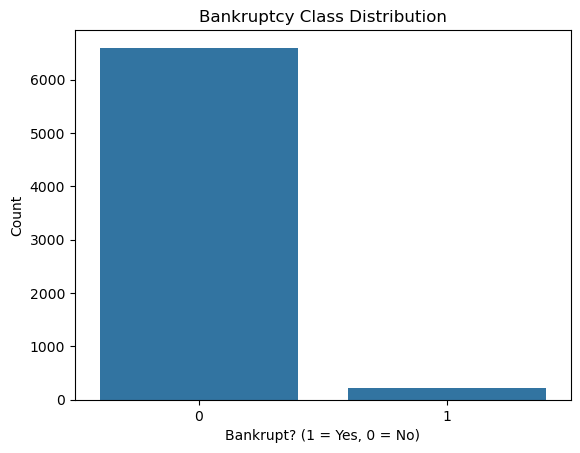

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check class distribution
print(df['Bankrupt?'].value_counts(normalize=True))

# Plot class distribution
sns.countplot(x='Bankrupt?', data=df)
plt.title('Bankruptcy Class Distribution')
plt.xlabel('Bankrupt? (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()



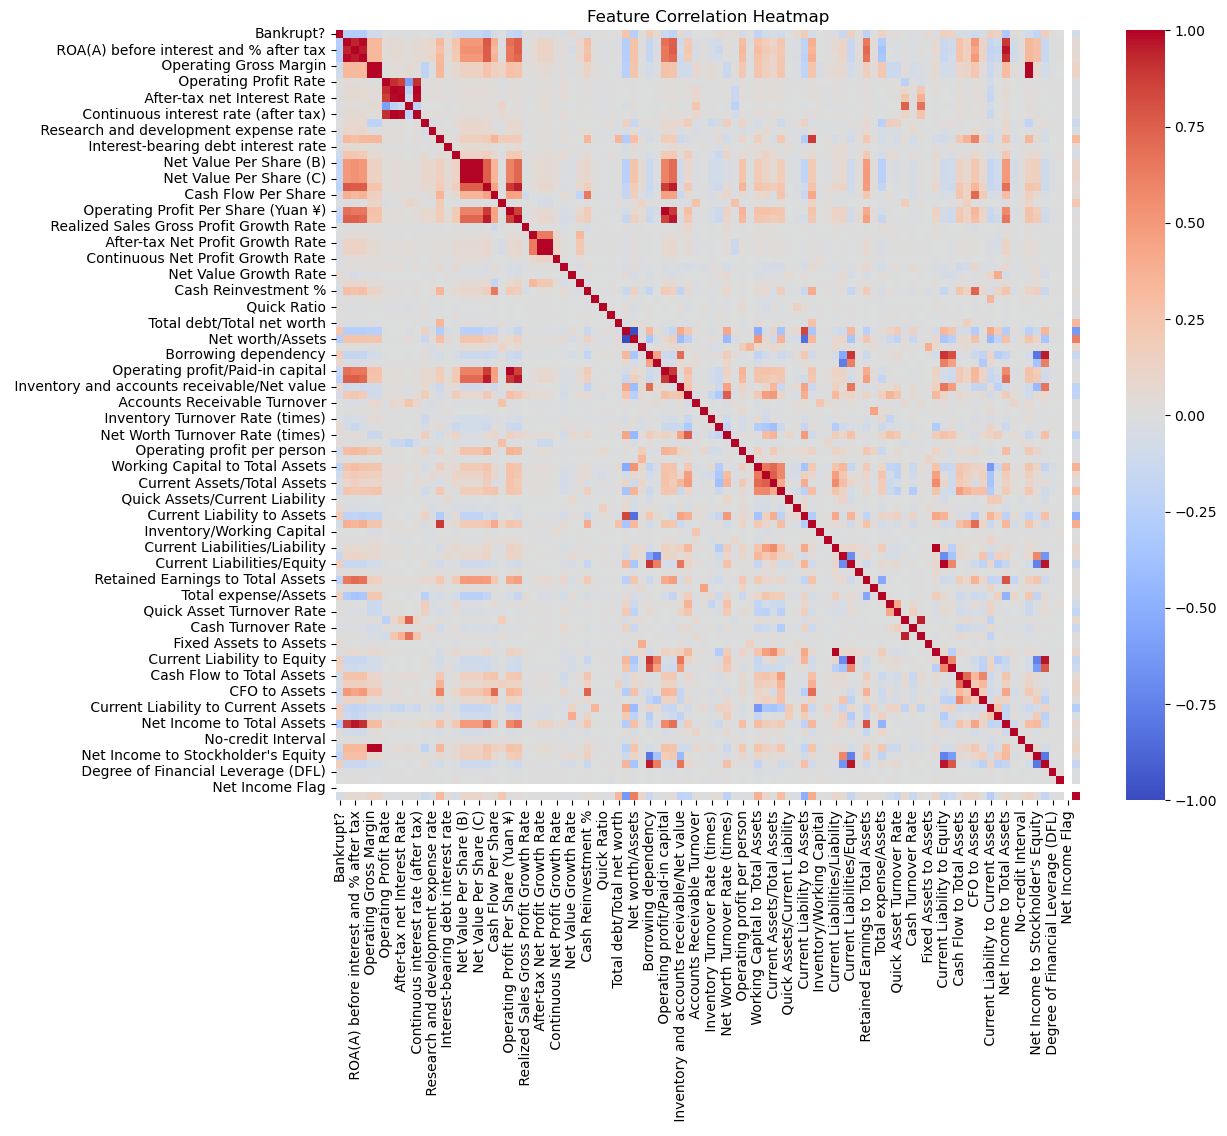

In [ ]:
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()


In [ ]:
In this dataset, most financial ratio features are weakly correlated (|r| < 0.5).

Cleaning Data

In [ ]:
df.columns = df.columns.str.strip()  # remove spaces
df.columns = df.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)  # clean symbols
print(df.columns.tolist())



['Bankrupt_', 'ROA_C_before_interest_and_depreciation_before_interest', 'ROA_A_before_interest_and_after_tax', 'ROA_B_before_interest_and_depreciation_after_tax', 'Operating_Gross_Margin', 'Realized_Sales_Gross_Margin', 'Operating_Profit_Rate', 'Pre_tax_net_Interest_Rate', 'After_tax_net_Interest_Rate', 'Non_industry_income_and_expenditure_revenue', 'Continuous_interest_rate_after_tax_', 'Operating_Expense_Rate', 'Research_and_development_expense_rate', 'Cash_flow_rate', 'Interest_bearing_debt_interest_rate', 'Tax_rate_A_', 'Net_Value_Per_Share_B_', 'Net_Value_Per_Share_A_', 'Net_Value_Per_Share_C_', 'Persistent_EPS_in_the_Last_Four_Seasons', 'Cash_Flow_Per_Share', 'Revenue_Per_Share_Yuan_', 'Operating_Profit_Per_Share_Yuan_', 'Per_Share_Net_profit_before_tax_Yuan_', 'Realized_Sales_Gross_Profit_Growth_Rate', 'Operating_Profit_Growth_Rate', 'After_tax_Net_Profit_Growth_Rate', 'Regular_Net_Profit_Growth_Rate', 'Continuous_Net_Profit_Growth_Rate', 'Total_Asset_Growth_Rate', 'Net_Value_Gr

In [ ]:
# Target column
target_col = 'Bankrupt_'  # after cleaning 'Bankrupt?'

# Features and target
X = df.drop(columns=[target_col])
y = df[target_col]

print("X shape:", X.shape)
print("y distribution:\n", y.value_counts(normalize=True))



X shape: (6819, 95)
y distribution:
 Bankrupt_
0    0.967737
1    0.032263
Name: proportion, dtype: float64


Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Train SVM model

In [ ]:

from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)




,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Model evaluation

Confusion Matrix:
 [[1320    0]
 [  44    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.00      0.00      0.00        44

    accuracy                           0.97      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.94      0.97      0.95      1364

ROC AUC Score: 0.8601756198347108


c:\Users\Omega7\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Omega7\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Omega7\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


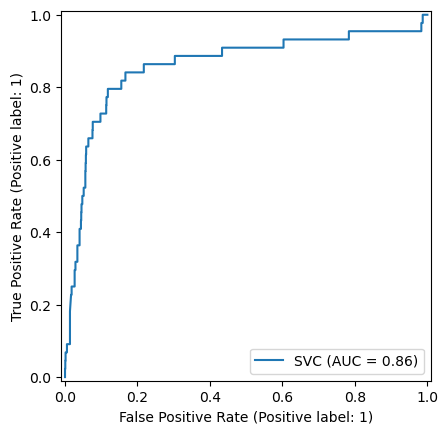

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
from sklearn.svm import SVC # Import the correct class, if you haven't already

# Assume X_test_scaled, y_test, and svm_model are defined.
# Make sure your svm_model is instantiated with probability=True:
# For example: svm_model = SVC(probability=True, random_state=42)
# You need to re-fit the model after making this change to the instantiation.

# Predictions
y_pred = svm_model.predict(X_test_scaled)
y_proba = svm_model.predict_proba(X_test_scaled)[:, 1] # This will now work

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# Classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

# ROC AUC
roc_auc = roc_auc_score(y_test, y_proba)
print('ROC AUC Score:', roc_auc)

# ROC Curve
RocCurveDisplay.from_estimator(svm_model, X_test_scaled, y_test)
plt.show()


Interpretation:

ROC-AUC ranges from 0.5 (random) to 1 (perfect)

Higher ROC-AUC indicates better distinction between bankrupt and non-bankrupt companies

Since recall and F1 score is >70% good model, but due to class imbalance it's not ideal 

In [ ]:
Due to Class imbalance using 'SMOTE' to balance the class

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,'balanced'
,verbose,False


In [ ]:
!pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm_model.fit(X_train_res, y_train_res)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


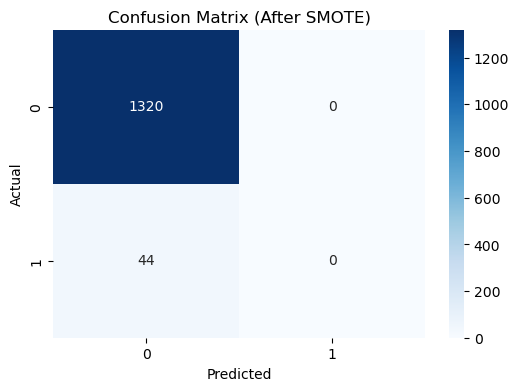

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (After SMOTE)')
plt.show()



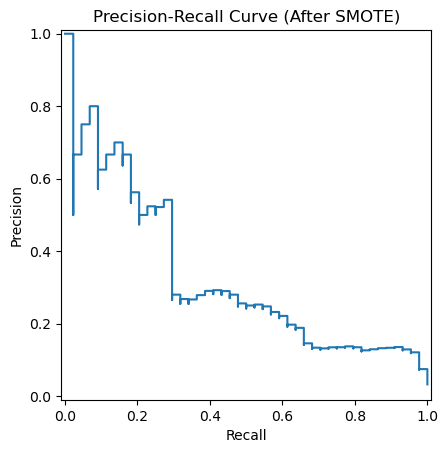

In [ ]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

precision, recall, _ = precision_recall_curve(y_test, y_proba)
PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.title('Precision-Recall Curve (After SMOTE)')
plt.show()


In [13]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)
print("Classification Report (After SMOTE):\n", classification_report(y_test, y_pred))

# Focus on bankrupt class
bankrupt_metrics = report['1']
print("\n✅ Bankrupt Class Metrics After SMOTE:")
print(f"Precision: {bankrupt_metrics['precision']:.3f}")
print(f"Recall: {bankrupt_metrics['recall']:.3f}")
print(f"F1-score: {bankrupt_metrics['f1-score']:.3f}")


Classification Report (After SMOTE):
               precision    recall  f1-score   support

           0       0.99      0.89      0.94      1980
           1       0.16      0.62      0.26        66

    accuracy                           0.88      2046
   macro avg       0.57      0.76      0.60      2046
weighted avg       0.96      0.88      0.91      2046


✅ Bankrupt Class Metrics After SMOTE:
Precision: 0.161
Recall: 0.621
F1-score: 0.256


In [ ]:
KNN Method

In [15]:

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance using SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())



Before SMOTE: Bankrupt?
0    4619
1     154
Name: count, dtype: int64
After SMOTE: Bankrupt?
0    4619
1    4619
Name: count, dtype: int64


In [16]:
 #Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_res, y_train_res)


plt.show()

Confusion Matrix:
 [[1767  213]
 [  25   41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94      1980
           1       0.16      0.62      0.26        66

    accuracy                           0.88      2046
   macro avg       0.57      0.76      0.60      2046
weighted avg       0.96      0.88      0.91      2046

Accuracy: 0.8836754643206256
ROC-AUC Score: 0.8460858585858587


Text(0.5, 1.0, 'KNN ROC Curve - Taiwanese Bankruptcy Prediction')

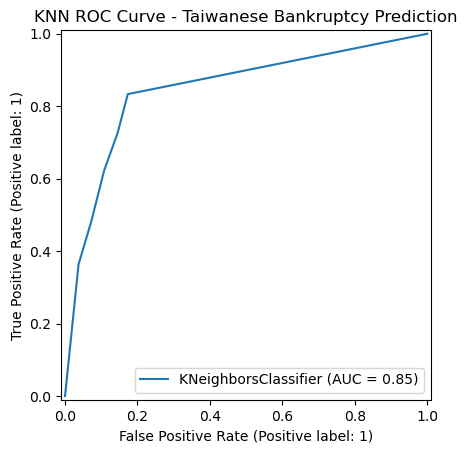

In [17]:
#  Predictions
y_pred = knn_model.predict(X_test_scaled)
y_proba = knn_model.predict_proba(X_test_scaled)[:, 1]

# Step 10: Evaluate model
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Step 11: Plot ROC Curve
RocCurveDisplay.from_estimator(knn_model, X_test_scaled, y_test)
plt.title("KNN ROC Curve - Taiwanese Bankruptcy Prediction")

Before SMOTE: Bankrupt?
0    4619
1     154
Name: count, dtype: int64
After SMOTE: Bankrupt?
0    4619
1    4619
Name: count, dtype: int64
Confusion Matrix:
 [[1720  260]
 [  19   47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.87      0.92      1980
           1       0.15      0.71      0.25        66

    accuracy                           0.86      2046
   macro avg       0.57      0.79      0.59      2046
weighted avg       0.96      0.86      0.90      2046

Accuracy: 0.8636363636363636
ROC-AUC Score: 0.8869911233547597


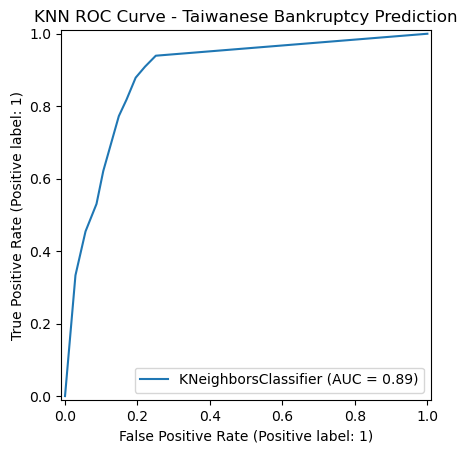

In [19]:

# K=10


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train_res, y_train_res)


y_pred = knn_model.predict(X_test_scaled)
y_proba = knn_model.predict_proba(X_test_scaled)[:, 1]

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

RocCurveDisplay.from_estimator(knn_model, X_test_scaled, y_test)
plt.title("KNN ROC Curve - Taiwanese Bankruptcy Prediction")
plt.show()
